Machine Learning Mastery
    
    AUTHOR: Dr. Jason Brownlee 

### How to Scale Data With Outliers for Machine Learning

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 6/Machine-Learning-Mastery_Robust"
os.chdir(DIR)

In [4]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from matplotlib import pyplot

**NOTA**. Sólo se incluye el código del escalamiento robusto, que es lo relevante al tema de Ingeniería de características

In [23]:
# load dataset
dataset = pd.read_csv('sonar.csv', header=None)
# retrieve just the numeric input values
data = dataset.values[:, :-1]

(208, 61)
    count      mean       std     min       25%      50%       75%     max
0   208.0  0.029164  0.022991  0.0015  0.013350  0.02280  0.035550  0.1371
1   208.0  0.038437  0.032960  0.0006  0.016450  0.03080  0.047950  0.2339
2   208.0  0.043832  0.038428  0.0015  0.018950  0.03430  0.057950  0.3059
3   208.0  0.053892  0.046528  0.0058  0.024375  0.04405  0.064500  0.4264
4   208.0  0.075202  0.055552  0.0067  0.038050  0.06250  0.100275  0.4010
5   208.0  0.104570  0.059105  0.0102  0.067025  0.09215  0.134125  0.3823
6   208.0  0.121747  0.061788  0.0033  0.080900  0.10695  0.154000  0.3729
7   208.0  0.134799  0.085152  0.0055  0.080425  0.11210  0.169600  0.4590
8   208.0  0.178003  0.118387  0.0075  0.097025  0.15225  0.233425  0.6828
9   208.0  0.208259  0.134416  0.0113  0.111275  0.18240  0.268700  0.7106
10  208.0  0.236013  0.132705  0.0289  0.129250  0.22480  0.301650  0.7342
11  208.0  0.250221  0.140072  0.0236  0.133475  0.24905  0.331250  0.7060
12  208.0  0.27

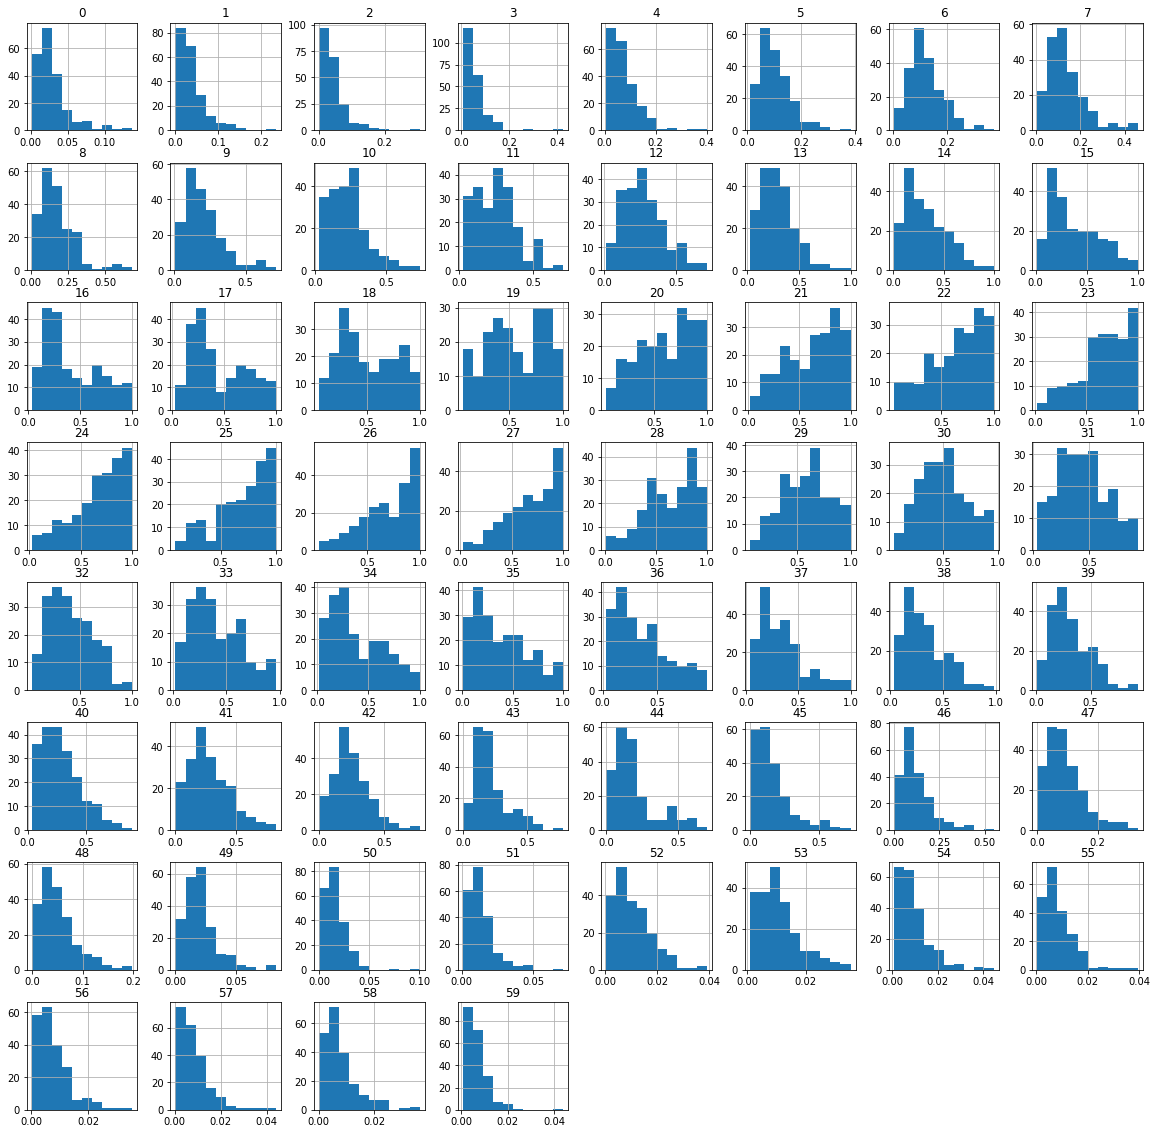

In [24]:
# summarize the shape of the dataset
print(dataset.shape)
# summarize each variable
print(dataset.describe().T)
# histograms of the variables
dataset.hist(figsize=(20,20))
pyplot.show()

    count      mean       std       min       25%           50%       75%  \
0   208.0  0.286664  1.035627 -0.959459 -0.425676  0.000000e+00  0.574324   
1   208.0  0.242430  1.046347 -0.958730 -0.455556  0.000000e+00  0.544444   
2   208.0  0.244416  0.985336 -0.841026 -0.393590  8.890458e-17  0.606410   
3   208.0  0.245291  1.159575 -0.953271 -0.490343  0.000000e+00  0.509657   
4   208.0  0.204137  0.892763 -0.896746 -0.392929  0.000000e+00  0.607071   
5   208.0  0.185100  0.880856 -1.221311 -0.374441 -1.034329e-16  0.625559   
6   208.0  0.202416  0.845252 -1.417921 -0.356361  9.714451e-17  0.643639   
7   208.0  0.254545  0.954889 -1.195402 -0.355200 -7.806256e-17  0.644800   
8   208.0  0.188804  0.867941 -1.061217 -0.404875  0.000000e+00  0.595125   
9   208.0  0.164263  0.853840 -1.086867 -0.451802 -8.847090e-17  0.548198   
10  208.0  0.065040  0.769748 -1.136311 -0.554234  0.000000e+00  0.445766   
11  208.0  0.005922  0.708239 -1.139932 -0.584376  7.025630e-17  0.415624   

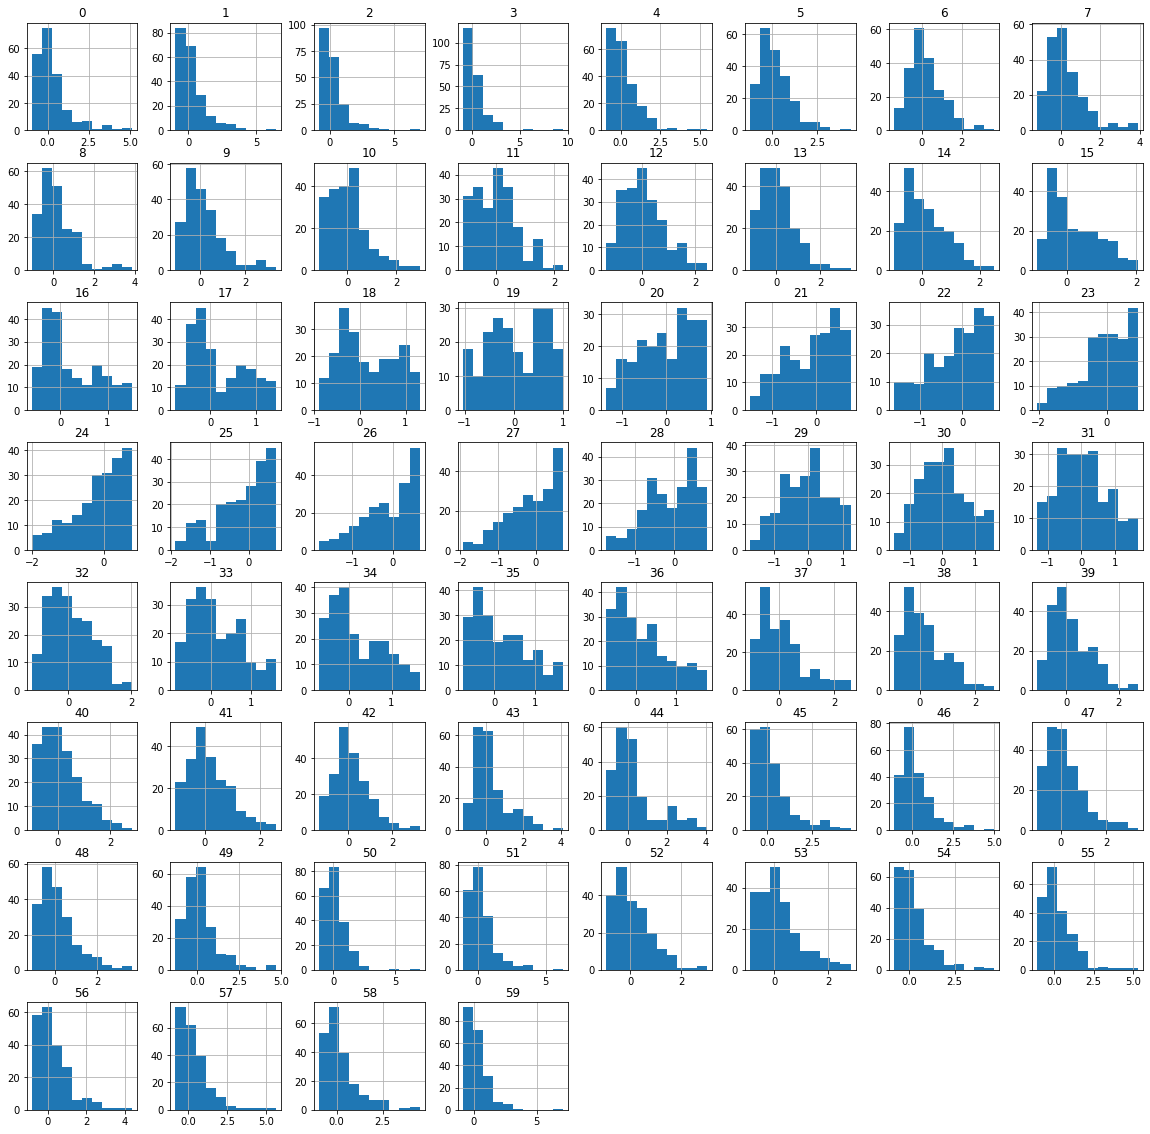

In [25]:
# perform a robust scaler transform of the dataset
trans = RobustScaler()
data = trans.fit_transform(data)
# convert the array back to a dataframe
dataset = DataFrame(data)
# summarize
print(dataset.describe().T)
# histograms of the variables
dataset.hist(figsize=(20,20))
pyplot.show()